In [1]:
import numpy as np
import scipy.stats as sps
import math
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Оценка параметра экспоненциального распределения.

Оценим параметр экспоненциального распределения как $s(X)=\sqrt[k]{k!/\overline{X^{k}}}$. Рассмотрим эту оценку для 10 различных $k$.

Возьмем $\theta = 1$. 

In [2]:
N = 10000
th = 1

In [3]:
def evalut(k):
    k_fact = float(math.factorial(k))
    k_degree_means = (sample ** k).cumsum() / np.arange(1, N + 1)
    ev = np.array((k_fact / k_degree_means) ** (1. / k))
    return ev

In [14]:
k_values = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
sample = sps.expon.rvs(loc=0, scale=th, size=N)
evalutions_array = np.array(map(evalut, k_values))

Сравнение <b>10</b> оценок:

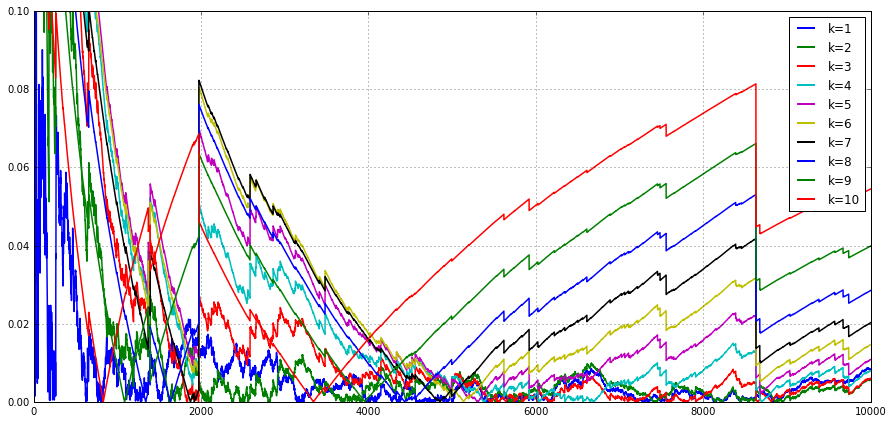

In [15]:
figure(figsize=(15, 7))
for i in range(10):
    plot(np.arange(1, N + 1), abs(evalutions_array[i] - th), label="k=%d" % k_values[i], linewidth = 1.5)
plt.ylim(0, 0.1)
leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)
plt.grid()
plt.show()

Сравним теперь <b>5</b> наилучших оценок. Видим, что при росте $k$ оценка ухудшается. 

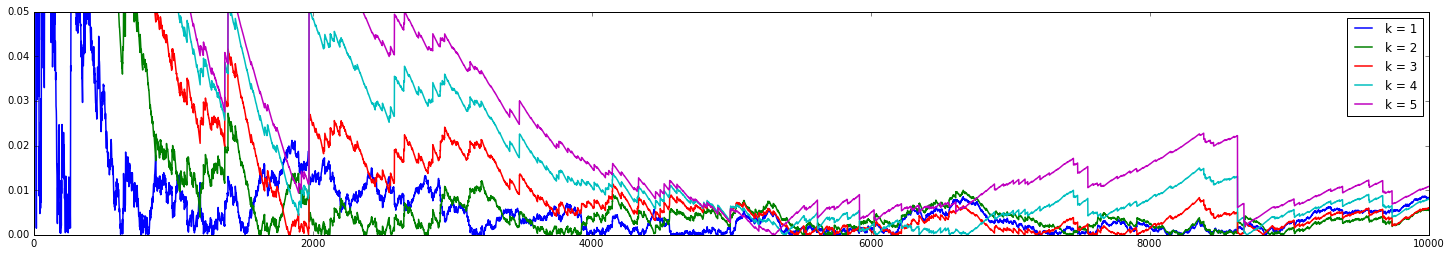

In [16]:
figure(figsize=(25, 4))
for i in range(5):
    plot(np.arange(1, N + 1), abs(evalutions_array[i] - th), label="k = %d" % k_values[i], linewidth = 1.5)
plt.ylim(0, 0.05)
plt.legend()
plt.show()

Оценка с $k = 4, 5$ даёт плохую оценку при небольших значениях размера выборки. Сравним оценки для $k=1,2,3.$ 

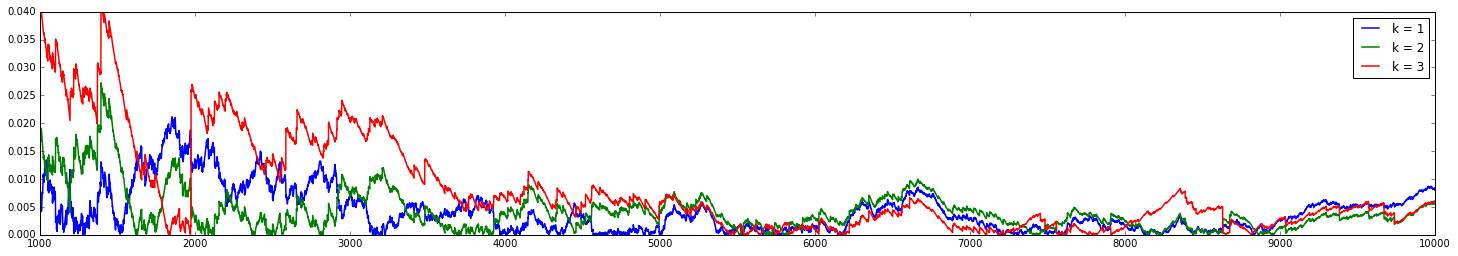

In [17]:
figure(figsize=(25, 4))
for i in range(3):
    plot(np.arange(1, N + 1), abs(evalutions_array[i] - th), label="k = %d" % k_values[i], linewidth = 1.5)
plt.ylim(0, 0.04)
plt.xlim(1000, 10000)
plt.legend()
plt.show()

Сравним оценки с $k = 1, 2, 3$ на различных выборках:

In [20]:
def exp(sample):
    
    k_values = np.array([1, 2, 3])
    evalutions_array = np.array(map(evalut, k_values))

    figure(figsize=(25, 4))
    for i in range(3):
        plot(np.arange(1, N + 1), abs(evalutions_array[i] - th), label="k = %d" % k_values[i], linewidth = 1.5)
    plt.ylim(0, 0.03)
    plt.xlim(1000, 10000)
    plt.legend()
    plt.show()

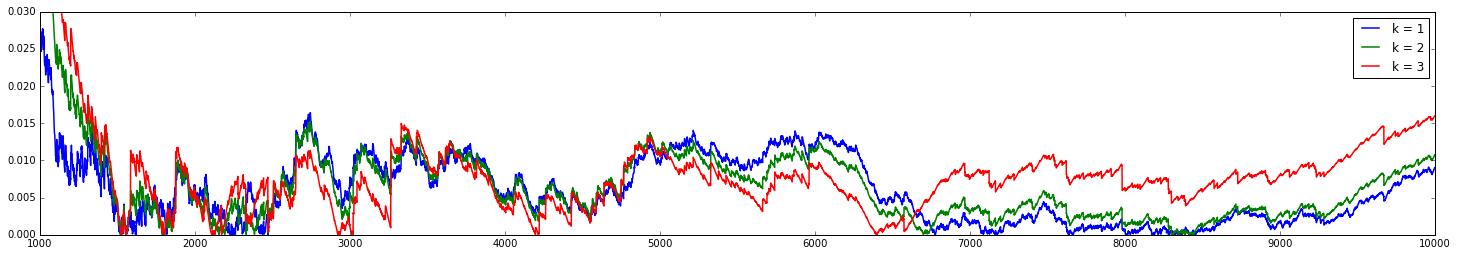

In [21]:
sample = sps.expon.rvs(loc=0, scale=th, size=N)
exp(1)

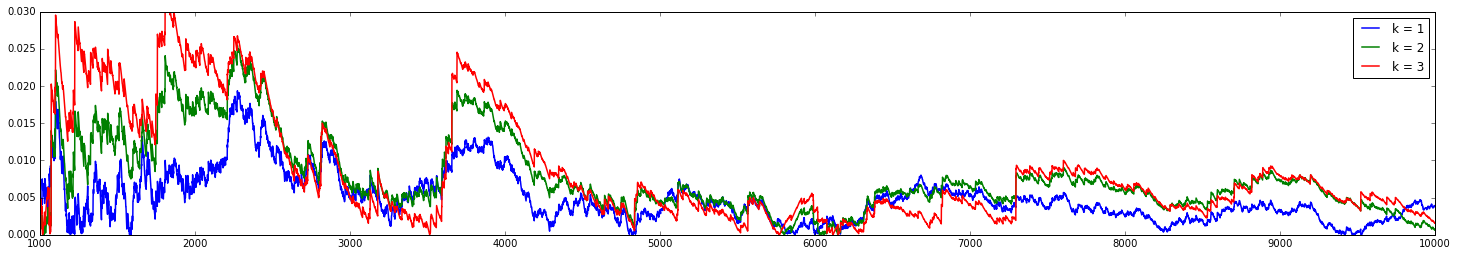

In [25]:
sample = sps.expon.rvs(loc=0, scale=th, size=N)
exp(1)

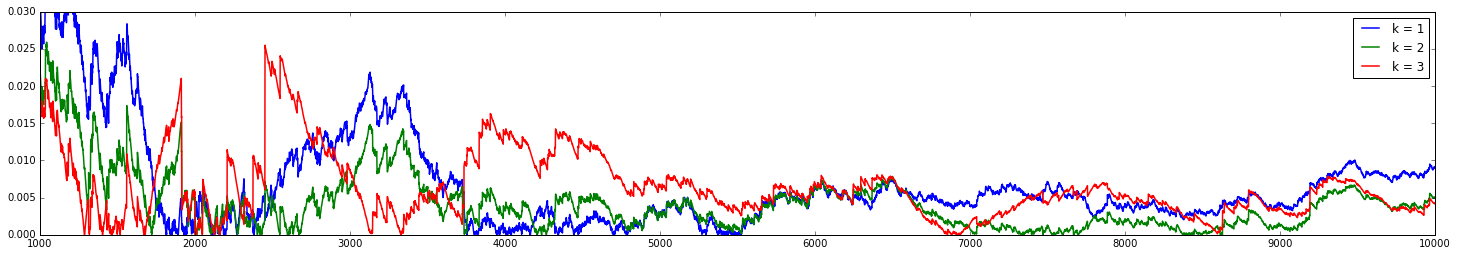

In [23]:
sample = sps.expon.rvs(loc=0, scale=th, size=N)
exp(1)

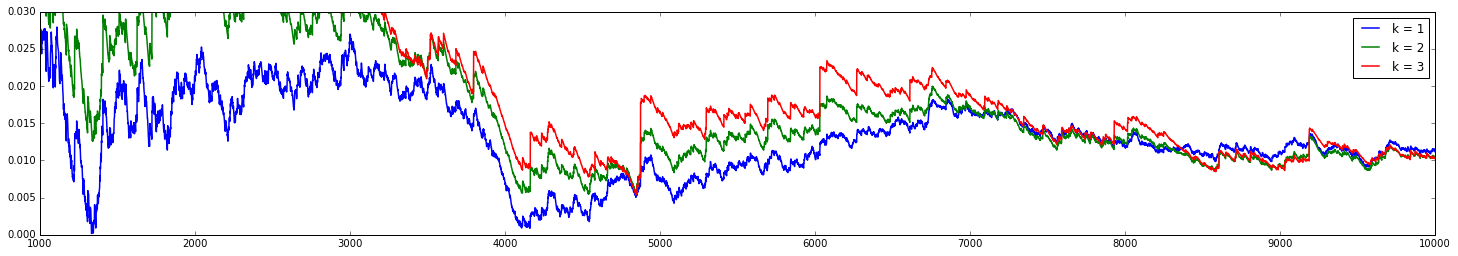

In [24]:
sample = sps.expon.rvs(loc=0, scale=th, size=N)
exp(1)

### Вывод:

По построенным графикам можно заключить, что параметр экспоненциального распределения оценивается наиболее точно при $k = 1, 2, 3.$ Причем из последних четырех графиков нельзя понять, какая из этих трех оценок лучше.